In [444]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [445]:
def f(x):
    return 3*x**2-4*x+5

In [446]:
f(3.0)


20.0

Text(0.5, 1.0, 'The graph is ')

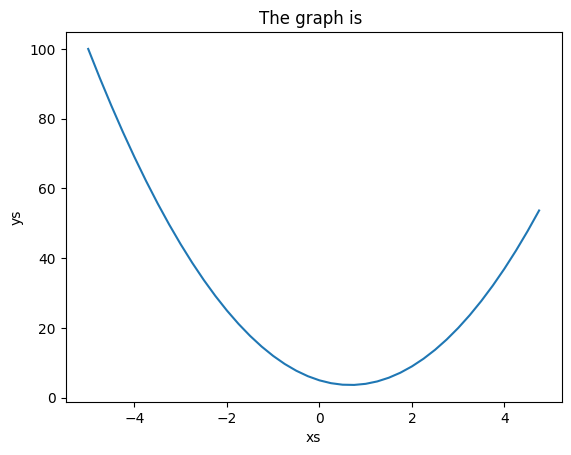

In [ ]:
xs=np.arange(-5,5,0.25)
ys=f(xs)
plt.plot(xs,ys)
plt.xlabel('xs')
plt.ylabel('ys')
plt.title('The graph is')

In [448]:
h=0.0001
x=5
f(x+h)/f(h)

12.00148005239531

In [449]:
h=0.0001
a=1
b=-2
c=4
d1=a*b+c
a+=h
d2=a*b+c
print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/f(h))

d1 2
d2 1.9998
slope -4.0003200015977674e-05


In [450]:
import os
graphviz_path = r'C:\Program Files\Graphviz\bin'  # Modify with the correct path on your system
os.environ["PATH"] += os.pathsep + graphviz_path

In [451]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): 
    return self * other

  def __truediv__(self, other): 
    return self * other**-1

  def __neg__(self):
    return self * -1

  def __sub__(self, other):
    return self + (-other)

  def __radd__(self, other): 
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


In [452]:
from graphviz import Digraph

def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) 
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)
  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [453]:
import os
graphviz_path = r'C:\Program Files\Graphviz\bin'  # Modify with the correct path on your system
os.environ["PATH"] += os.pathsep + graphviz_path


In [454]:
# draw_dot(L)
# L.backward()

In [455]:
# draw_dot(L)

In [456]:
def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  c.data+=h
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data
  
  print((L2 - L1)/h)
  
lol()

-1.9999999999988916


In [457]:
# L=d*f
# dL/dd=f=-2
# dL/df=d=4
# dL/dc=dL/dd * dd/dc=-2.0*1.0=-2.0
# dL/de=dL/de * de/dc=-2.0*1.0=-2.0
# dL/da=dL/dc*dc/da=-2.0*-3.0=6.0
# dL/db=dL/dc*dc/db=-2.0*2.0=-4.0



In [458]:
# L.grad=-8.0
# d.grad=-2
# f.grad=4
# c.grad=-2.0
# d.grad=-2.0
# a.grad=6.0
# b.grad=-4.0

In [459]:
# draw_dot(L)

In [460]:
# a.data+=0.01*a.grad
# b.data+=0.01*b.grad
# c.data+=0.01*c.grad

# e=a*b
# d=c+e
# L=d*f
# print(L)

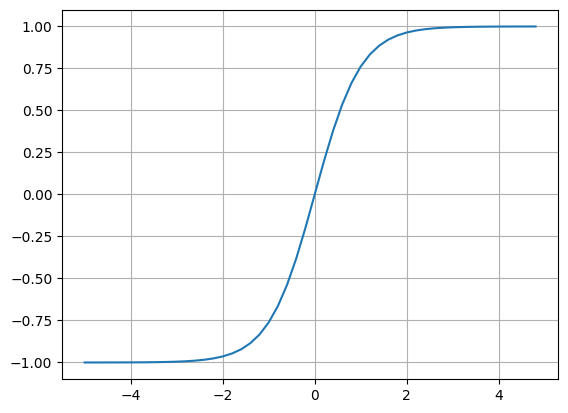

In [461]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)))
plt.grid()

In [462]:

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

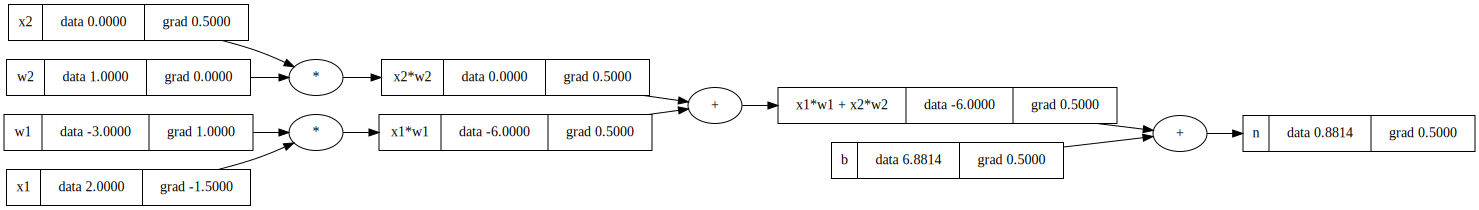

In [463]:
draw_dot(n)

In [464]:
# o.grad=1.0
# n.grad=0.5
# b.grad=0.5
# x1w1x2w2.grad=0.5
# x1w1.grad=0.5
# x2w2.grad=0.5
# w1.grad=1
# x1.grad=-1.5
# w2.grad=0
# x2.grad=0.5



In [465]:
o.grad=1.0

In [466]:
n._backward()

In [467]:
b._backward()

In [468]:
x1w1x2w2._backward()

In [469]:
x1w1._backward()

In [470]:
x2w2._backward()

In [471]:
x1._backward()

In [472]:
w1._backward()

In [473]:
x2._backward()

In [474]:
w2._backward()

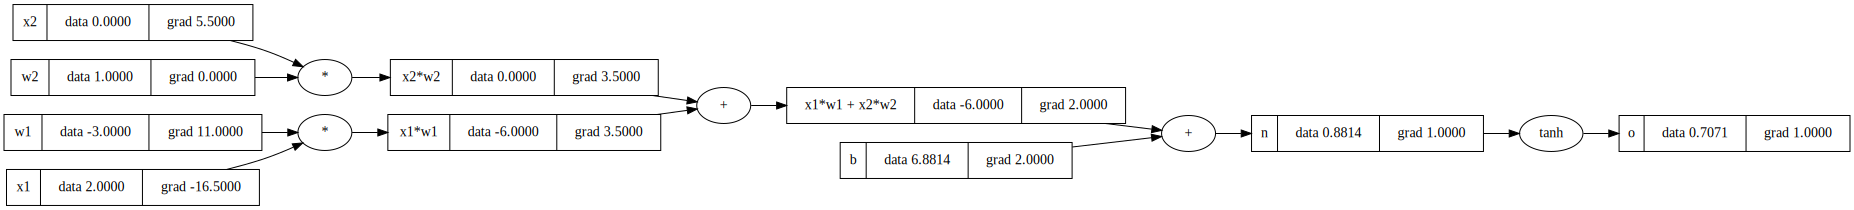

In [475]:
o.backward()
draw_dot(o)

In [476]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

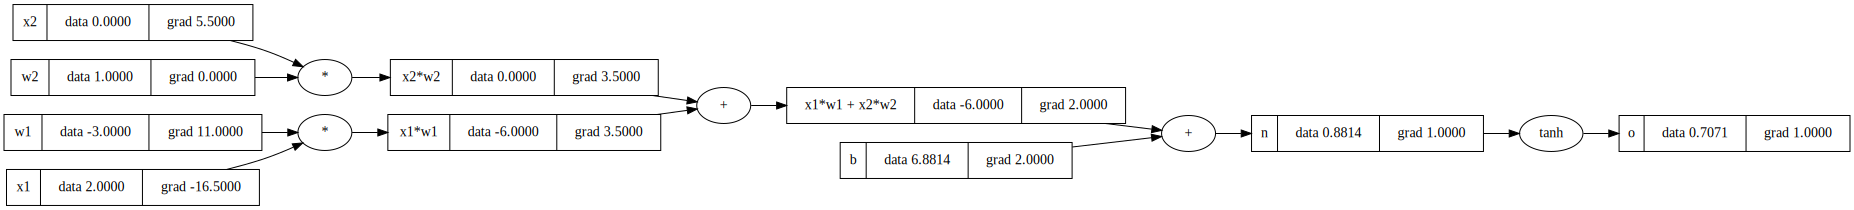

In [477]:
draw_dot(o)

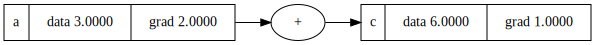

In [478]:

a=Value(3.0,label='a')
c=a+a;c.label='c'
c.backward()
draw_dot(c)

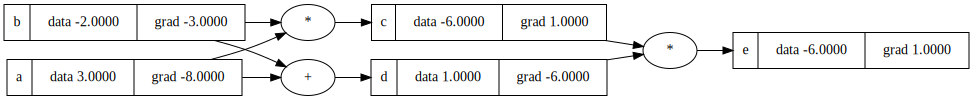

In [479]:
a=Value(3.0,label='a')
b=Value(-2.0,label='b')
c=a*b; c.label='c'
d=a+b; d.label='d'
e=c*d; e.label='e'
e.backward()
draw_dot(e)

In [480]:
a=Value(4.0)
a+1

Value(data=5.0)

In [481]:
a=Value(5.0)
a*2

Value(data=10.0)

In [482]:
a=Value(2.0)
a.exp()

Value(data=7.38905609893065)

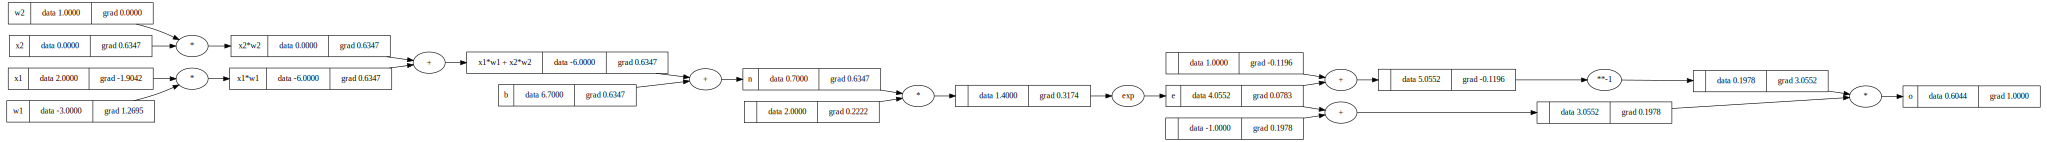

In [483]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.7, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
e=(2*n).exp();e.label='e'
o = (e-1)/(e+1); o.label = 'o'
o.backward()
draw_dot(o)


In [484]:
import torch

In [485]:
torch.Tensor([[1,2,3],[4,5,6]])


tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [486]:
x1=torch.Tensor([2.0]).double()  ; x1.requires_grad=True
x2=torch.Tensor([0.0]).double()  ; x2.requires_grad=True
w1=torch.Tensor([-3.0]).double() ; w1.requires_grad=True
w2=torch.Tensor([1.0]).double()  ; w2.requires_grad=True
b=torch.Tensor([6.7]).double()  ; b.requires_grad=True
n=w1*x1 + x2*w2 + b
o=torch.tanh(n)
o.data.item()
o.backward()
print('x1',x1.grad.item())
print('x2',x2.grad.item())
print('w1',w1.grad.item())
print('w2',w2.grad.item())

x1 -1.9042192089612318
x2 0.6347397363204106
w1 1.2694794726408212
w2 0.0


In [487]:
# n=Layer(3,4)
# n(x)

In [488]:
class Neuron:
  
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  
  def __call__(self, x):
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [489]:
import random

In [490]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.9742662653477213)

In [491]:
len(n.parameters())

41

In [492]:
len(n.parameters())

41

In [493]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [0.5, -0.4, -0.6, 0.4] 

In [494]:
ypred=[n(x)]

In [495]:
for k in range(20):
  
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

0 3.7159035183755
1 0.4243408574133801
2 0.0695024846800933
3 0.03481303027794848
4 0.019925000222840657
5 0.01291310491812777
6 0.010268178270065483
7 0.008536405089346808
8 0.00783594029768786
9 0.007018487310546112
10 0.006982368203406422
11 0.006493305718355888
12 0.006961084331393089
13 0.006606618170888235
14 0.007547848772137669
15 0.00717239756465652
16 0.008570051984072527
17 0.008014422885618875
18 0.009824415847976373
19 0.008934973663023245


In [9]:
import math
maxlr=3e-4
minlr=maxlr*0.1
warmup_steps=10
max_steps=50

def getlr(step):
    if(step<warmup_steps):
        return maxlr *(step+1)/warmup_steps
    if step>max_steps:
        return minlr
    decay=(step-warmup_steps) / (max_steps-warmup_steps)
    assert 0<=decay<=1
    coeff=0.5*(1.0 +math.cos(math.pi * decay))
    return minlr+coeff*(maxlr-minlr)
for step in range(max_steps):
    lr=getlr(step)
    print(lr)

2.9999999999999997e-05
5.9999999999999995e-05
8.999999999999999e-05
0.00011999999999999999
0.00015
0.00017999999999999998
0.00020999999999999998
0.00023999999999999998
0.00026999999999999995
0.0003
0.0002999999999999999
0.0002995838400539722
0.0002983379259803436
0.00029626993925368627
0.0002933926296998457
0.00028972373688902363
0.0002852858807654296
0.0002801064221878024
0.00027421729424061787
0.00026765480535600414
0.00026045941546018383
0.0002526754865245747
0.0002443510090594838
0.00023553730623665305
0.00022628871746483876
0.00021666226336928708
0.00020671729424061788
0.00019651512412054723
0.00018611865278043115
0.00017559197792325906
0.00016499999999999997
0.0001544080220767409
0.0001438813472195688
0.0001334848758794528
0.0001232827057593821
0.00011333773663071286
0.00010371128253516117
9.446269376334689e-05
8.564899094051613e-05
7.732451347542522e-05
6.954058453981609e-05
6.234519464399581e-05
5.5782705759382104e-05
4.989357781219755e-05
4.471411923457034e-05
4.02762631109762

In [ ]:
 def configure_optimizers(self, weight_decay, learning_rate, betas, device_type):
        # start with all of the candidate parameters
        param_dict = {pn: p for pn, p in self.named_parameters()}
        # filter out those that do not require grad
        param_dict = {pn: p for pn, p in param_dict.items() if p.requires_grad}
        # create optim groups. Any parameters that is 2D will be weight decayed, otherwise no.
        # i.e. all weight tensors in matmuls + embeddings decay, all biases and layernorms don't.
        decay_params = [p for n, p in param_dict.items() if p.dim() >= 2]
        nodecay_params = [p for n, p in param_dict.items() if p.dim() < 2]
        optim_groups = [
            {'params': decay_params, 'weight_decay': weight_decay},
            {'params': nodecay_params, 'weight_decay': 0.0}
        ]
        num_decay_params = sum(p.numel() for p in decay_params)
        num_nodecay_params = sum(p.numel() for p in nodecay_params)
        print(f"num decayed parameter tensors: {len(decay_params)}, with {num_decay_params:,} parameters")
        print(f"num non-decayed parameter tensors: {len(nodecay_params)}, with {num_nodecay_params:,} parameters")
        # Create AdamW optimizer and use the fused version if it is available
        fused_available = 'fused' in inspect.signature(torch.optim.AdamW).parameters
        use_fused = fused_available and device_type == 'cuda'
        extra_args = dict(fused=True) if use_fused else dict()
        optimizer = torch.optim.AdamW(optim_groups, lr=learning_rate, betas=betas, **extra_args)
        print(f"using fused AdamW: {use_fused}")

        return optimizer